# Esercitazione 9

## Esercizio 09.1

Vogliamo risolvere il problema del commesso viaggiatore utilizzando un algoritmo genetico.

Dobbiamo risolvere il problema per:
- 32 città distribuite casualmente su una circonferenza di raggio unitario
- 32 città disribuite casualmente dentro un quadrato di lato 2. 

Per usare l'algoritmo genetico creiamo una popolazione composta da 500 individui, ciascuno caratterizzato da una sequenza "genetica" di numeri da 0 a 31 che rappresenta l'ordine con cui le città vengono visitate. Quando creiamo la popolazione (generazione 0) la sequenza di ciascun individuo è generata in modo casuale e, di conseguenza, le città vengono visitate in ordine casuale.

Una volta creata la popolazione calcoliamo la distanza $L^{(1)}$ che ciascun individuo percorre e ordiniamo gli individui da quello con la distanza minore (il migliore) a quello con la distanza maggiore (il peggiore).

A questo punto possiamo iniziare a far riprodurre e mutare i nostri individui. 

Le mutazioni che abbiamo implementato, con le rispettive probabilità, sono:
- Scambio di due geni (i.e. città). $p = 0.1$
- Shift di un numero casuale di geni $p = 0.1$
- Permutazione di un numero casuale di geni contigui. $p = 0.1$
- Inversione di un numero casuale di geni. $p = 0.1$

Aggiungiamo anche la possibiltà che due individui facciano crossing over con una probabilità $p=0.5$.

Ogni volta che facciamo una modifica a un individuo usiamo condizioni periodiche al contorno e controlliamo che nel nuovo individuo siano presenti tutte le città.

Per ogni generazione diamo a tutti gli individui la possibilità di ripdrodursi, e quindi di mutare; cicliamo su tutti gli individui e per ogni individuo vediamo se viene selezionato per il crossing over e/o per una mutazione "individuale" (un individuo molto fortunato potenzialmente può fare tutte le mutazioni e fare anche crossing over). 

Se l'individuo è selezionato per una mutazione casuale può fare una o più delle mutazioni che abbiamo implementato, ciascuna con $p = 0.1$, questo vuol dire che è possibile che l'individuo selezionato in realtà non muti affatto, ma anche che faccia tutte e quattro le mutazioni.

Se l'individuo è selezionato per il crossing over facciamo un altro ciclo su tutti gli individui e vediamo quali vengono selezionati per il crossing over. A questo punto il primo individuo selezionato fa crossing over con ognuno degli individui selezionati nel secondo ciclo con una probabilità del 50%.

La funzione di selezione legge la posizione dell'individuo in esame all'interno della popolazione e ci dice se l'individuo viene selezionato o meno. Questa funzione è fatta in modo che gli individui migliori abbiamo più possibilità dei peggiori di essere selezionati e quindi di riprodursi. Abbiamo usato due funzioni di selezione diverse, una per il crossing over e una per le mutazioni individuali; le funzioni sono in realtà identiche ma la funzione di selezione per le mutazioni individuali ha una probabilità di successo più bassa. Questo, unito alla già bassa (0.1) probabilità di mutare effettivamente dopo essere stati selezionati per le mutazioni individuali ci dovrebbe garantire che gli individui migliori non mutino troppo frequentemente andando così ad allontanarsi dalla sequenza migliore.

Dopo una generazione quindi tutti gli individui hanno avuto la possibilità di mutare in tutti i modi possibili, vengono di nuovo riordinati dal migliore al peggiore e si passa la generazione successiva.

Riportiamo i risultati che abbiamo ottenuto per una popolazione di 500 individui dopo 5000 generazioni. Riportiamo una rappresentazione del percorso migliore dell'ultima generazione, del valore della distanza percorsa dal miglior individuo per ogni generazione, del valor medio delle distanze calcolato sulla migliore metà della popolazione e del valor medio calcolato su tutta la popolazione in funzione del numero di generazioni passate.

Riportiamo anche un confronto tra i risultati ottenuti tenendo come punto di partenza fisso la prima città o lasciando che il percorso potesse partire da tutte le città. Per tenere fissa la prima città o permettere alle mutazioni di modificare anche la città di partenza è sufficiente modificare la forma delle condizioni periodiche al contorno.

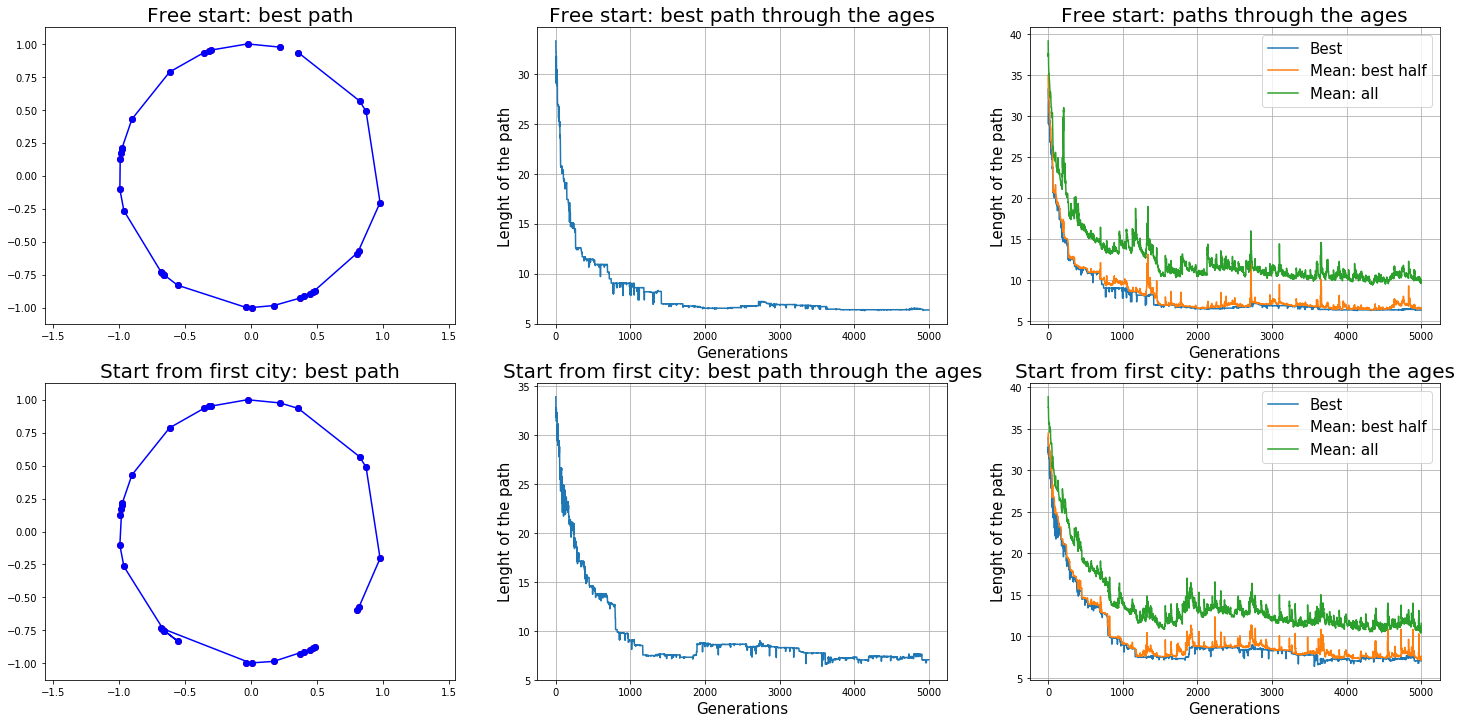

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

cities_NoFirst = np.genfromtxt("Esercizio_09.1/Cities.Circum.NoFirst.dat")
best_NoFirst = np.genfromtxt("Esercizio_09.1/Best.Circum.NoFirst.dat")
lenghts_NoFirst = np.genfromtxt("Esercizio_09.1/Hall_of_Fame.Circum.Nofirst.dat")

cities = np.genfromtxt("Esercizio_09.1/Cities.Circum.dat")
best = np.genfromtxt("Esercizio_09.1/Best.Circum.dat")
lenghts = np.genfromtxt("Esercizio_09.1/Hall_of_Fame.Circum.dat")


fig, axs = plt.subplots(nrows=2, ncols=3, figsize=[25,12])  #plots

ax = axs[0,0]
ax.scatter(cities_NoFirst[:,0], cities_NoFirst[:,1], color = 'red')
ax.scatter(best_NoFirst[:,1], best_NoFirst[:,2], color = 'blue')
ax.plot(best_NoFirst[:,1], best_NoFirst[:,2], color = 'blue')
ax.set_title("Free start: best path", fontsize = '20')
ax.set_xlim (-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.axis('equal')

ax = axs[0,1]
ax.plot(lenghts_NoFirst[:,0], lenghts_NoFirst[:,1])
ax.set_title("Free start: best path through the ages", fontsize = '20')
ax.set_xlabel ("Generations", fontsize = '15')
ax.set_ylabel ("Lenght of the path", fontsize = '15')
ax.grid()

ax = axs[0,2]
ax.plot(lenghts_NoFirst[:,0], lenghts_NoFirst[:,1], label = "Best")
ax.plot(lenghts_NoFirst[:,0], lenghts_NoFirst[:,2], label = "Mean: best half")
ax.plot(lenghts_NoFirst[:,0], lenghts_NoFirst[:,3], label = "Mean: all")
ax.set_title("Free start: paths through the ages", fontsize = '20')
ax.set_xlabel ("Generations", fontsize = '15')
ax.set_ylabel ("Lenght of the path", fontsize = '15')
ax.legend(fontsize = '15')
ax.grid()

ax = axs[1,0]
ax.scatter(cities[:,0], cities[:,1], color = 'red')
ax.scatter(best[:,1], best[:,2], color = 'blue')
ax.plot(best[:,1], best[:,2], color = 'blue')
ax.set_title("Start from first city: best path", fontsize = '20')
ax.set_xlim (-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.axis('equal')

ax = axs[1,1]
ax.plot(lenghts[:,0], lenghts[:,1])
ax.set_title("Start from first city: best path through the ages", fontsize = '20')
ax.set_xlabel ("Generations", fontsize = '15')
ax.set_ylabel ("Lenght of the path", fontsize = '15')
ax.grid()

ax = axs[1,2]
ax.plot(lenghts[:,0], lenghts[:,1], label = "Best")
ax.plot(lenghts[:,0], lenghts[:,2], label = "Mean: best half")
ax.plot(lenghts[:,0], lenghts[:,3], label = "Mean: all")
ax.set_title("Start from first city: paths through the ages", fontsize = '20')
ax.set_xlabel ("Generations", fontsize = '15')
ax.set_ylabel ("Lenght of the path", fontsize = '15')
ax.legend(fontsize = '15')
ax.grid()

plt.show()

In entrambi i casi il percorso è stato ottimizzato in modo soddisfacente. Non si notano particolari differenze tra tenere la partenza fissata o libera, forse tenere la partenza libera permette un'ottimizzazione leggermente migliore ma è anche vero che in un problema reale i punti di partenza e di arrivo sono spesso fissati (per esempio la città in cui vive il commesso viaggiatore) quindi non è detto che abbia senso ottimizzare facendo variare la posizione di partenza.

Riportiamo anche quanto abbiamo trovato per le città disposte all'interno di un quadrato.

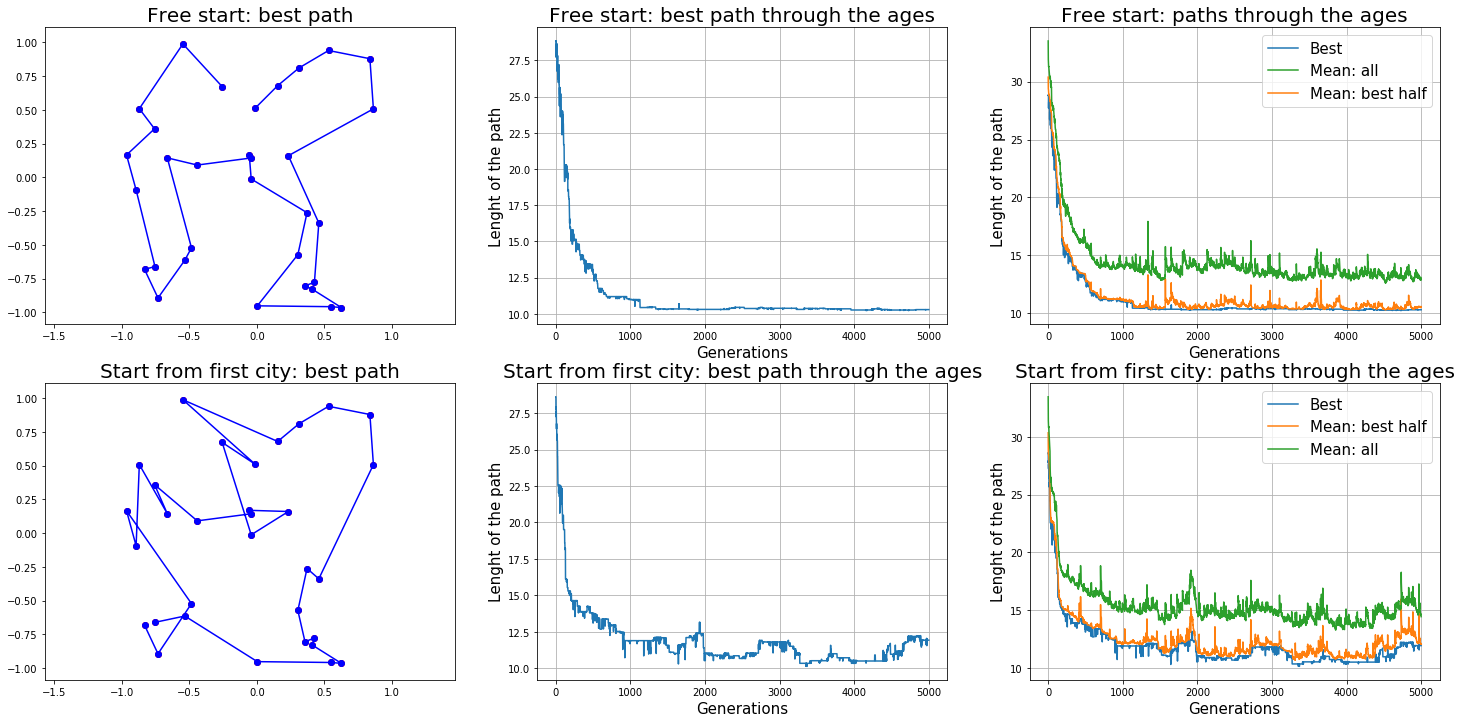

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

cities_NoFirst = np.genfromtxt("Esercizio_09.1/Cities.NoFirst.dat")
best_NoFirst = np.genfromtxt("Esercizio_09.1/Best.NoFirst.dat")
lenghts_NoFirst = np.genfromtxt("Esercizio_09.1/Hall_of_Fame.NoFirst.dat")

cities = np.genfromtxt("Esercizio_09.1/Cities.dat")
best = np.genfromtxt("Esercizio_09.1/Best.dat")
lenghts = np.genfromtxt("Esercizio_09.1/Hall_of_Fame.dat")


fig, axs = plt.subplots(nrows=2, ncols=3, figsize=[25,12])  #plots

ax = axs[0,0]
ax.scatter(cities_NoFirst[:,0], cities_NoFirst[:,1], color = 'red')
ax.scatter(best_NoFirst[:,1], best_NoFirst[:,2], color = 'blue')
ax.plot(best_NoFirst[:,1], best_NoFirst[:,2], color = 'blue')
ax.set_title("Free start: best path", fontsize = '20')
ax.set_xlim (-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.axis('equal')

ax = axs[0,1]
ax.plot(lenghts_NoFirst[:,0], lenghts_NoFirst[:,1])
ax.set_title("Free start: best path through the ages", fontsize = '20')
ax.set_xlabel ("Generations", fontsize = '15')
ax.set_ylabel ("Lenght of the path", fontsize = '15')
ax.grid()

ax = axs[0,2]
ax.plot(lenghts_NoFirst[:,0], lenghts_NoFirst[:,1], label = "Best")
ax.errorbar(lenghts_NoFirst[:,0], lenghts_NoFirst[:,2], label = "Mean: best half")
ax.plot(lenghts_NoFirst[:,0], lenghts_NoFirst[:,3], label = "Mean: all")
ax.set_title("Free start: paths through the ages", fontsize = '20')
ax.set_xlabel ("Generations", fontsize = '15')
ax.set_ylabel ("Lenght of the path", fontsize = '15')
ax.legend(fontsize = '15')
ax.grid()

ax = axs[1,0]
ax.scatter(cities[:,0], cities[:,1], color = 'red')
ax.scatter(best[:,1], best[:,2], color = 'blue')
ax.plot(best[:,1], best[:,2], color = 'blue')
ax.set_title("Start from first city: best path", fontsize = '20')
ax.set_xlim (-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.axis('equal')

ax = axs[1,1]
ax.plot(lenghts[:,0], lenghts[:,1])
ax.set_title("Start from first city: best path through the ages", fontsize = '20')
ax.set_xlabel ("Generations", fontsize = '15')
ax.set_ylabel ("Lenght of the path", fontsize = '15')
ax.grid()

ax = axs[1,2]
ax.plot(lenghts[:,0], lenghts[:,1], label = "Best")
ax.plot(lenghts[:,0], lenghts[:,2], label = "Mean: best half")
ax.plot(lenghts[:,0], lenghts[:,3], label = "Mean: all")
ax.set_title("Start from first city: paths through the ages", fontsize = '20')
ax.set_xlabel ("Generations", fontsize = '15')
ax.set_ylabel ("Lenght of the path", fontsize = '15')
ax.legend(fontsize = '15')
ax.grid()

plt.show()

In questo caso la differenza tra tenere la prima città fissa oppure no è sicuramente più evidente ma vale il discorso fatto in precedenza e non è detto che abbia senso lasciare la prima città libera.